# 데이터 준비

In [1]:
import pandas as pd

# 농어의 3가지 특성 준비 - 길이, 높이, 두께
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [2]:
import numpy as np

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고,
# 특성끼리 서로 곱한 항을 추가합니다.
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 10)

In [6]:
# 10개의 특성이 어떻게 만들어졌는지 확인합니다.
poly.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [7]:
# 테스트 세트도 변환해줍니다.
test_poly = poly.transform(test_input)

# 다중 회귀 모델 훈련

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)
# 여러가지 특성을 추가해 복잡도를 높혀주니 정확도가 많이 올랐습니다.

0.9903183436982125

In [9]:
lr.score(test_poly, test_target)
# 앞에서 보았던 과소적합 문제는 나타나지 않습니다.

0.9714559911594142

In [10]:
# PolynomialFeatures 클래스의 degree 매개변수를 사용해 
# 필요한 고차항의 최대 차수를 지정할 수 있습니다.
poly = PolynomialFeatures(degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 56)

In [11]:
# 훈련 세트 특성 개수를 올리니 정확도가 1에 가깝습니다.
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999998992

In [12]:
# 모델 복잡도가 너무 올라 훈련 세트에 너무 과대적합된 모델이 됩니다.
# 파라미터값을 적절히 조절할 필요가 있습니다.
lr.score(test_poly, test_target)

-144.40623052362318

# 규제

In [13]:
# ridge와 rasso 모델을 실습하기 위해 정규화를 진행합니다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)
# 위에서 1에 가까웠던 점수가 조금 낮아졌습니다.

0.9896101671037343

In [15]:
ridge.score(test_scaled, test_target)
# 과대적합되지 않아 테스트 세트에서도 좋은 성능을 냅니다.

0.9790693977615403

#### 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조정할 수 있습니다.
#### 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절합니다.

### 적절한 alpha값 찾기

In [16]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # alpha list로 alpha값을 변경해가며 score 점수를 받아보겠습니다.
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

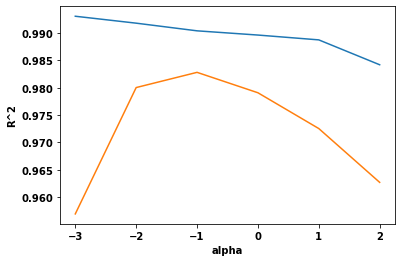

In [17]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#### 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 0.1 입니다.(log 함수로 바꾸었기 때문)

In [18]:
# alpha 값을 0.1로 하여 최종 ridge 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.990381581757037
0.9827976465386976


## 라쏘 회귀

In [19]:
# ridge 모델과 방법은 똑같습니다.
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [20]:
lasso.score(test_scaled, test_target)

0.9800593698421886

In [21]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\SH\anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957793986, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\SH\anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345388978, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


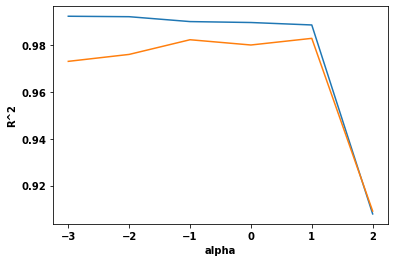

In [22]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [23]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706696


In [24]:
print(np.sum(lasso.coef_==0))

41


##### 56개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개 밖에 되지 않습니다. 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있습니다